Function to scrape article text. We will use this a few cells down, I'm just putting it up here for now...

In [ ]:
def scrape_article_text(article_url):
    try:
        article_response = requests.get(article_url)
        if article_response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(article_response.content, 'html.parser')

            # Try to find the main article text (this can vary between websites)
            # Common tags for article content: <p>, <div>, <article>
            paragraphs = soup.find_all('p')  # maybe change this on a site by site basis...

            # Extract and concatenate the text from the paragraphs
            article_text = ' '.join([para.get_text() for para in paragraphs])

            return article_text if article_text else "No text found"
        else:
            return f" {article_response.status_code}"

    except Exception as e:
        return f"{str(e)}"

# This is the code for scraping stuff from newsdata for Donald Trump, from Mexico


In [ ]:
import requests
import json

API_KEY = ''

url = 'https://newsdata.io/api/1/news'

params = {
    'apikey': API_KEY,
    'q': '"Donald Trump" AND "Elección"',
    'country': 'mx',  # country code for Mexico
    'language': 'es',  # Spanish language for Mexico
}

response = requests.get(url, params=params)


if response.status_code == 200:
    data_trump = response.json()

    #print(data)

    if 'results' in data_trump:
        articles_trump = data_trump['results']
        for i, article in enumerate(articles_trump, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")

if 'results' in data_trump:
    articles_trump = data_trump['results']
    with open('articles_trump.txt', 'w') as f:  # Open the file in write mode
        for i, article in enumerate(articles_trump, 1):
            f.write(f"Article {i}:\n")
            f.write(f"Title: {article.get('title')}\n")
            f.write(f"Description: {article.get('description')}\n")
            f.write(f"Published At: {article.get('pubDate')}\n")
            f.write(f"Source: {article.get('source_id')}\n")
            f.write(f"Link: {article.get('link')}\n")
            f.write("-" * 50 + "\n")
else:
    print("No articles found.")


Article 1:
Title: Esperanza empresarial: La CMIC ve visos positivos en el triunfo de Trump
Description: El discurso de Donald Trump luego de conocerse su ventaja en las elecciones presidenciales de Estados Unidos la madrugada del miércoles pasado. La CMIC Yucatán ve oportunidades de desarrollo para el país y la región norte del continente con el retorno del magnate a la Casa Blanca " data-medium-file="https://i0.wp.com/newspack-yucatan.s3.amazonaws.com/uploads/2024/11/IMG-51468491.jpg?fit=300%2C160&ssl=1" data-large-file="https://i0.wp.com/newspack-yucatan.s3.amazonaws.com/uploads/2024/11/IMG-51468491.jpg?fit=780%2C416&ssl=1" />Pese a la amenaza que hiciera en campaña Donald Trump de aumentar hasta en un 100% los aranceles a México si ganaba las elecciones, los constructores yucatecos consideran que “el presidente electo va a ser una persona que impulse mucho la fortaleza de Estados Unidos, y siempre que a Estados Unidos le va bien ante [...]
Published At: 2024-11-09 09:00:00
Sou

# This is similar code for Kamala Harris

In [ ]:
params = {
    'apikey': API_KEY,
    'q': '"Donald Trump" AND "Elección"',
    'country': 'mx',  # country code for Mexico
    'language': 'es',  # Spanish language for Mexico
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_harris = response.json()

    if 'results' in data_harris:
        articles_harris = data_harris['results']
        for i, article in enumerate(articles_harris, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Article 1:
Title: Esperanza empresarial: La CMIC ve visos positivos en el triunfo de Trump
Description: El discurso de Donald Trump luego de conocerse su ventaja en las elecciones presidenciales de Estados Unidos la madrugada del miércoles pasado. La CMIC Yucatán ve oportunidades de desarrollo para el país y la región norte del continente con el retorno del magnate a la Casa Blanca " data-medium-file="https://i0.wp.com/newspack-yucatan.s3.amazonaws.com/uploads/2024/11/IMG-51468491.jpg?fit=300%2C160&ssl=1" data-large-file="https://i0.wp.com/newspack-yucatan.s3.amazonaws.com/uploads/2024/11/IMG-51468491.jpg?fit=780%2C416&ssl=1" />Pese a la amenaza que hiciera en campaña Donald Trump de aumentar hasta en un 100% los aranceles a México si ganaba las elecciones, los constructores yucatecos consideran que “el presidente electo va a ser una persona que impulse mucho la fortaleza de Estados Unidos, y siempre que a Estados Unidos le va bien ante [...]
Published At: 2024-11-09 09:00:00
Sou

This actually gets the article text, the above just gets links

In [ ]:
from bs4 import BeautifulSoup

harris_texts = []
trump_texts = []

for i, article in enumerate(articles_harris, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    harris_texts.append(article_text)
    print(f"Article Text: {article_text}")

for i, article in enumerate(articles_trump, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    trump_texts.append(article_text)
    print(f"Article Text: {article_text}")


Article Text: Diario de Yucatán 
					El periódico de la vida peninsular				 Regístrate a nuestro newsletter para recibir las noticias más importantes.  Δ Pese a la amenaza que hiciera en campaña Donald Trump de aumentar hasta en un 100% los aranceles a México si ganaba las elecciones, los constructores yucatecos consideran que “el presidente electo va a ser una persona que impulse mucho la fortaleza de Estados Unidos, y siempre que a Estados Unidos le va bien ante el mundo, también le va bien a México”, declaró Raúl Monforte González, presidente de la Cámara Mexicana de la Industria de la Construcción (CMIC) Yucatán. “Los dos países, México y Estados Unidos, tienen una historia, una solidez institucional que cuando una persona ocupa la cabeza o la titularidad de la presidencia de un país, desde luego que impone sus ideas, su forma de pensar, la plataforma política que lo impulsó, de su partido, de su ideología, etcétera, pero es tan fuerte la institución-país que no puede haber afecta

installing word cloud library

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("spanish"))

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


create combined text

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trump_scrape_text = ""
for i in trump_texts:
  trump_scrape_text += i

trump_scrape_text = remove_stopwords(trump_scrape_text)

harris_scrape_text = ""
for i in harris_texts:
  harris_scrape_text += i

harris_scrape_text = remove_stopwords(harris_scrape_text)


START HERE if replicating our results

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("spanish"))

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
harris_file_text = []
trump_file_text = []

with open("../data/mexico_harris_texts.txt", "r") as file:
    harris_file_text = file.read()
harris_file_text = remove_stopwords(harris_file_text)
with open("../data/mexico_trump_texts.txt", "r") as file:
    trump_file_text = file.read()
trump_file_text = remove_stopwords(trump_file_text)

In [4]:
mode = "f" #"f" or "s" - decides if scraping data (s) or using saved data in file (f)
harris_comb_text = []
trump_comb_text = []
if(mode == "s"):
  harris_comb_text = harris_scrape_text
  trump_comb_text = trump_scrape_text
else:
  harris_comb_text = harris_file_text
  trump_comb_text = trump_file_text

In [6]:
!pip install wordcloud matpoltlib

ERROR: Could not find a version that satisfies the requirement matpoltlib (from versions: none)
ERROR: No matching distribution found for matpoltlib


show word clouds and word frequency YAY!

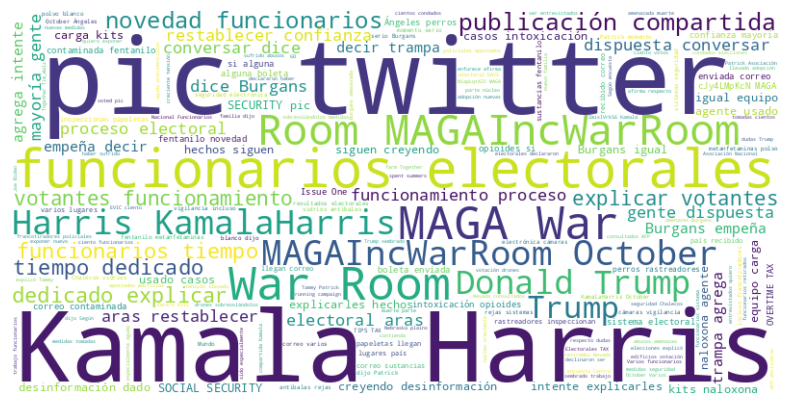

--------------------------------------------------


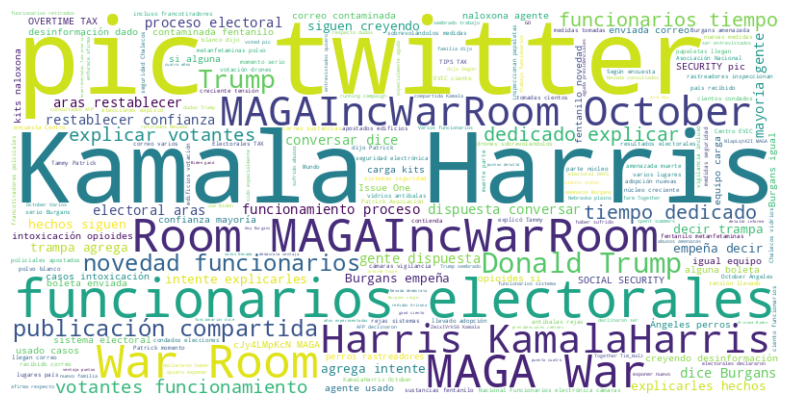

--------------------------------------------------
Word: pic twitter, Frequency: 1.0
Word: Kamala Harris, Frequency: 0.9824561403508771
Word: funcionarios electorales, Frequency: 0.8771929824561403
Word: MAGA War, Frequency: 0.6491228070175439
Word: War Room, Frequency: 0.6491228070175439
Word: Room MAGAIncWarRoom, Frequency: 0.6491228070175439
Word: MAGAIncWarRoom October, Frequency: 0.6491228070175439
Word: Harris KamalaHarris, Frequency: 0.631578947368421
Word: Donald Trump, Frequency: 0.5964912280701754
Word: Trump, Frequency: 0.5087719298245614
Word: publicación compartida, Frequency: 0.42105263157894735
Word: novedad funcionarios, Frequency: 0.40350877192982454
Word: funcionarios tiempo, Frequency: 0.40350877192982454
Word: tiempo dedicado, Frequency: 0.40350877192982454
Word: dedicado explicar, Frequency: 0.40350877192982454
Word: explicar votantes, Frequency: 0.40350877192982454
Word: votantes funcionamiento, Frequency: 0.40350877192982454
Word: funcionamiento proceso, Frequenc

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(harris_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_harris, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")


In [13]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00


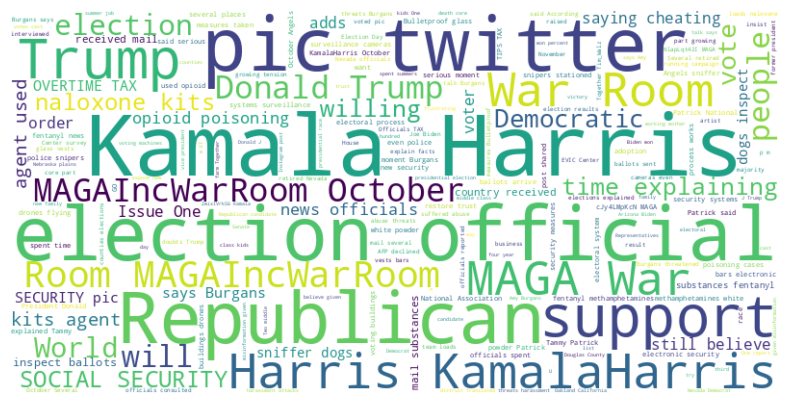

--------------------------------------------------


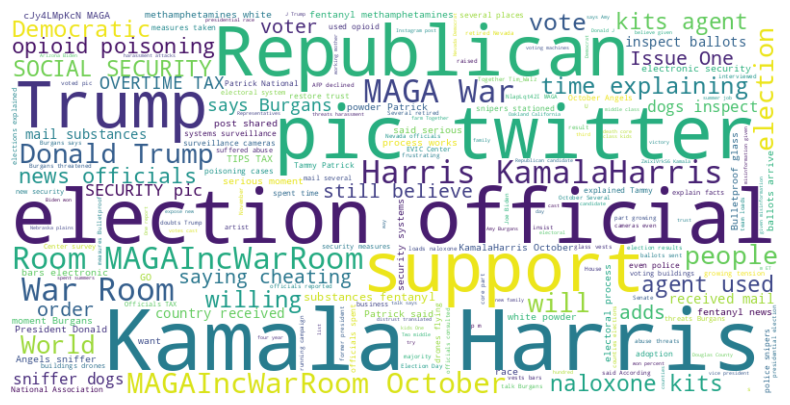

--------------------------------------------------
Word: Kamala Harris, Frequency: 1.0
Word: election official, Frequency: 1.0
Word: pic twitter, Frequency: 0.9821428571428571
Word: Republican, Frequency: 0.9107142857142857
Word: support, Frequency: 0.8571428571428571
Word: Trump, Frequency: 0.7857142857142857
Word: Harris KamalaHarris, Frequency: 0.6428571428571429
Word: MAGA War, Frequency: 0.625
Word: War Room, Frequency: 0.625
Word: Room MAGAIncWarRoom, Frequency: 0.625
Word: MAGAIncWarRoom October, Frequency: 0.625
Word: Donald Trump, Frequency: 0.5892857142857143
Word: people, Frequency: 0.5535714285714286
Word: will, Frequency: 0.5357142857142857
Word: election, Frequency: 0.5178571428571429
Word: World, Frequency: 0.48214285714285715
Word: vote, Frequency: 0.42857142857142855
Word: Democratic, Frequency: 0.4107142857142857
Word: willing, Frequency: 0.4107142857142857
Word: time explaining, Frequency: 0.4107142857142857
Word: SOCIAL SECURITY, Frequency: 0.39285714285714285
Word:

In [14]:
from deep_translator import GoogleTranslator

# Function to split the text into smaller chunks
def split_text(text, max_length):
    words = text.split(' ')
    chunks = []
    current_chunk = []

    for word in words:
        if len(' '.join(current_chunk + [word])) <= max_length:
            current_chunk.append(word)
        else:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks
# Reduce max_chars_per_chunk to avoid exceeding the limit
max_chars_per_chunk = 2000  # Adjusted to a safer limit
harris_chunks = split_text(harris_comb_text, max_chars_per_chunk)
trump_chunks = split_text(trump_comb_text, max_chars_per_chunk)

# Translate each chunk with error handling
translator = GoogleTranslator(source='auto', target='en')

def translate_chunks(chunks):
    translated_chunks = []
    for chunk in chunks:
        try:
            translated_chunk = translator.translate(chunk)
            translated_chunks.append(translated_chunk)
        except Exception as e:
            print(f"Translation error: {e}")
            translated_chunks.append("")  # Add empty string if translation fails
    return translated_chunks

translated_harris_chunks = translate_chunks(harris_chunks)
english_harris = ' '.join(translated_harris_chunks)

translated_trump_chunks = translate_chunks(trump_chunks)
english_trump = ' '.join(translated_trump_chunks)

# Generate and display the word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(english_trump)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trump, interpolation='bilinear')
plt.axis('off')
plt.show()

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(english_harris)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_harris, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display word frequencies
print("-" * 50)
words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)
words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")